In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/naive.csv')

In [3]:
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [4]:
df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


In [5]:
df['diabetes'].value_counts()

diabetes
1    498
0    497
Name: count, dtype: int64

In [6]:
df.shape

(995, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [10]:
df.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


<Axes: >

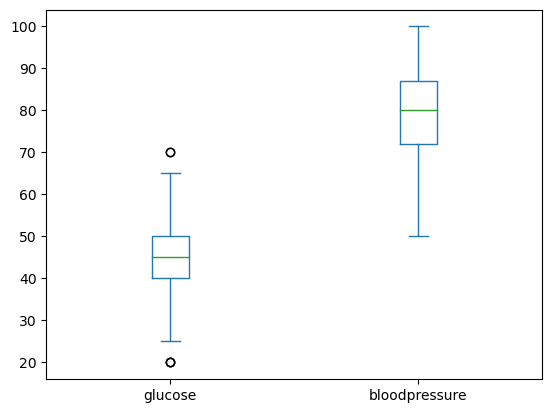

In [12]:
df.drop('diabetes',axis=1).plot(kind='box')

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(175, 3)

In [15]:
df.isnull().values.any()

False

In [16]:
q1,q3=df['glucose'].quantile([0.25,0.75])
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

In [17]:
indices=df[(df['glucose']<lower_bound) | (df['glucose']>upper_bound)].index

In [19]:
df=df.drop(indices,axis=0)

In [20]:
df.shape

(170, 3)

In [21]:
df['diabetes'].value_counts()

diabetes
1    120
0     50
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=df.drop('diabetes',axis=1)
y=df['diabetes']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [27]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred=nb.predict(x_test)

In [29]:
accuracy=accuracy_score(y_test,y_pred)

In [30]:
accuracy

0.7843137254901961

In [31]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 8,  7],
       [ 4, 32]], dtype=int64)

In [32]:
class_report=classification_report(y_test,y_pred)
class_report

'              precision    recall  f1-score   support\n\n           0       0.67      0.53      0.59        15\n           1       0.82      0.89      0.85        36\n\n    accuracy                           0.78        51\n   macro avg       0.74      0.71      0.72        51\nweighted avg       0.78      0.78      0.78        51\n'